## <b> CATTLE IDENTIFICATION THROUGH TRANSFER LEARNING </b>

<span style="color:red;">This Project intends to replicate the results obtained from the Paper titled  **" CORF3D contour maps with application to Holstein cattle recognition from RGB and thermal images** as pasted below.</span>

---

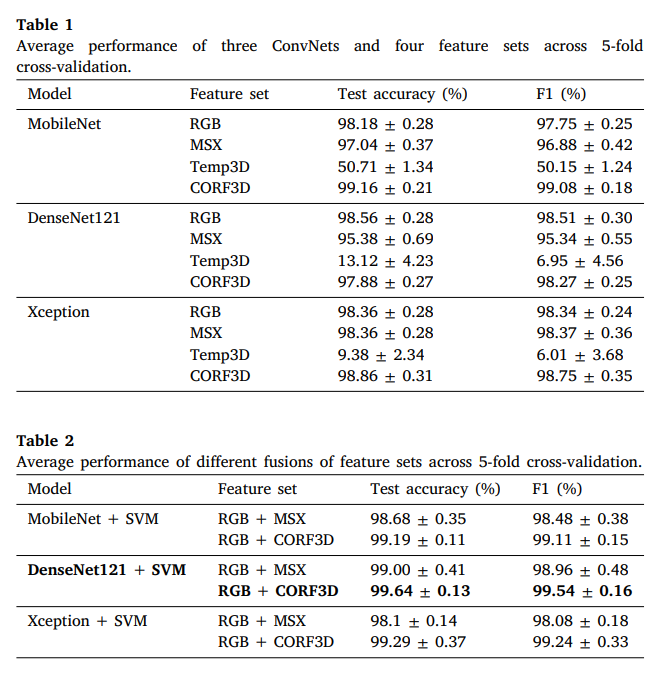

---
In the Paper, two approaches are investigated. All the layers of the pre-trained Convnet are unfrozen and fine tuned with the training images of the Holstein cattle data. The first approach uses transfer learning with a single feature set. Each of the four feature sets presented in the data were passed through three different pre-trained model and their accuracy was recorded. The second approach involves using a pre-trained convnet model as a feature extraction tool to be fed in a linear SVM model. So two different feature sets was passed through a pre-trained model with similar architecture and the feature extracted passed through a linear SVM. 

In [ ]:
# Mounting the files on a drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Installing Opendataset to be used to download the files from the URL

!pip install opendatasets --upgrade --quiet

dataset_url = 'https://dataverse.nl/dataset.xhtml?persistentId=doi:10.34894/7M108F'

In [ ]:
# Data URLs 

rGB_Thermal_url = 'https://dataverse.nl/api/access/datafile/200628'
cORF3D_url = 'https://dataverse.nl/api/access/datafile/200627'
temperature_url = 'https://dataverse.nl/api/access/datafile/200629'
timestamp_url = 'https://dataverse.nl/api/access/datafile/200631'
test_data = 'https://dataverse.nl/api/access/datafile/200626'


In [ ]:
# Function to download dataset from URL

import opendatasets as od
def data_acces_url_todir(a,b,c,d,e):
  files_= [a,b,c,d,e]
  for x in files_:
    od.download(x)
 

In [ ]:
# Downloading dataset from URL

data_acces_url_todir(rGB_Thermal_url,cORF3D_url,temperature_url,timestamp_url,test_data)

60465152it [00:07, 8476781.45it/s]                               


1175183360it [01:31, 12832368.94it/s]                                


69550080it [00:07, 9793297.24it/s]                               


163840it [00:01, 117110.13it/s]                           


265617408it [00:20, 12734271.24it/s]                               


In [ ]:
# Creating file directory for Zipped downloaded dataset files

!mkdir Cattle_data
!mkdir Cattle_data/MISC

# Directories for train data and test data
cattle_data_dir = './Cattle_data'
cattle_data_dir_train = './Cattle_data/Train'
cattle_data_dir_test = './Cattle_data/Test'

In [ ]:
# Directories for unzipped downloaded files

zipfile_preprocessed_dir = './Preprocessed.zip'
Zip_CORF3D = './CORF3D.zip'
Zip_Temp = './Temperature.zip'
Zip_test = './Raw.zip'

In [ ]:
# Function for unzipping downloaded zipped files to directory

import shutil
def unzip(a, b, c, file_directory):
  file_2=[a,b,c]
  for x in file_2:
    shutil.unpack_archive(x, file_directory)

In [ ]:
# Unzipping downloaded zipped files to directory

unzip(Zip_CORF3D,Zip_Temp,zipfile_preprocessed_dir,cattle_data_dir_train)

In [ ]:
# Moving Zipped Test Data to directory

shutil.unpack_archive(Zip_test, cattle_data_dir_test)

In [ ]:
# Moving RGB files from the Preprocessed directory to the Train directory

import os
os.replace("./Cattle_data/Train/Preprocessed/RGB","./Cattle_data/Train/RGB")


In [ ]:
# Moving Thermal files from the Preprocessed directory to the Train directory

os.replace("./Cattle_data/Train/Preprocessed/Thermal","./Cattle_data/Train/Thermal")

In [ ]:
# Deleting Pre-processed folder as it is empty

os.rmdir("./Cattle_data/Train/Preprocessed")

In [ ]:
# Changing the directory of unused __MACOS folder

os.replace("./Cattle_data/Train/__MACOSX","./Cattle_data/MISC/__MACOSX")

In [ ]:
# Changing the directory of unused __MACOS folder

os.replace("./Cattle_data/Test/__MACOSX","./Cattle_data/MISC/___MACOSX")

In [ ]:
# Checking data directory

import os
os.listdir(cattle_data_dir)


['MISC', 'Test', 'Train']

In [ ]:
# Checking data directory

os.listdir(cattle_data_dir_train)

['CORF3D', 'Temperature', 'Thermal', 'RGB']

In [ ]:
# Checking Test data Directory

os.listdir(cattle_data_dir_test)

['Raw']

Based on the paper, we will be fine tuning the pre-trained model **mobilenet** with the images from the RGB. 

In [ ]:
# Image file directory for RGB
cattle_data_dir_train_rgb = "./Cattle_data/Train/RGB"

In [ ]:
# Acessing some of images from the RGB images

%matplotlib inline
import cv2, matplotlib.pyplot as plt
img = cv2.imread("./Cattle_data/Train/RGB/0086/0086_1_1.jpg")


In [ ]:
# Viewing the shape of the image file 

img.shape

(224, 224, 3)

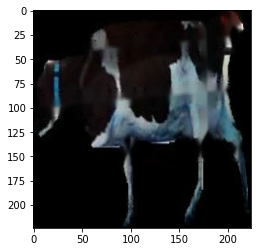

In [ ]:
# Viewing some of the images of the RGB

plt.imshow(img)

In [ ]:
# Accessing another image of the RGB

%matplotlib inline
import cv2, matplotlib.pyplot as plt
img = cv2.imread("./Cattle_data/Train/RGB/0087/0087_4_1.jpg")


In [ ]:
# Viewing the shape of the RGB

img.shape

(224, 224, 3)

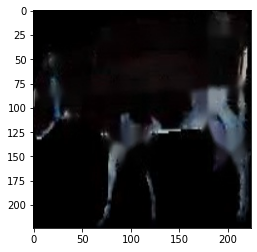

In [ ]:
# Viewing the image

plt.imshow(img)


In [ ]:
# Moving dataset to the Image folder for further analysis

from torchvision.datasets import ImageFolder

rgb_dataset = ImageFolder(cattle_data_dir_train_rgb)

In [ ]:
# Length of the rgb dataset

len(rgb_dataset)

2214

In [ ]:
# Number of classes in the RGB file 

num_classes = len(rgb_dataset.classes)
num_classes

310

In [ ]:
# Printing the number of files in each classes

for cls in os.listdir(cattle_data_dir_train_rgb):
  print(cls, ':', len(os.listdir(cattle_data_dir_train_rgb + "/" + cls)))

0298 : 1
0643 : 14
7883 : 10
0892 : 10
7780 : 12
7107 : 9
0673 : 11
7833 : 7
0234 : 9
7516 : 10
8268 : 8
0093 : 5
0284 : 2
6851 : 9
8010 : 11
7476 : 6
0534 : 13
7699 : 10
0665 : 4
0498 : 9
0146 : 7
0589 : 2
0341 : 7
7845 : 1
7630 : 9
0441 : 13
6848 : 1
1263 : 5
7870 : 7
8231 : 1
7666 : 7
8237 : 10
6740 : 9
0296 : 4
0316 : 1
7549 : 9
1038 : 4
0491 : 3
7184 : 3
7946 : 1
8191 : 9
0151 : 1
7952 : 1
0563 : 6
6769 : 10
7853 : 3
0423 : 11
0199 : 9
8012 : 1
7831 : 9
3997 : 3
9772 : 9
7967 : 9
0266 : 10
0367 : 1
7753 : 9
0541 : 7
0243 : 10
7830 : 1
0684 : 1
1064 : 9
7248 : 10
7815 : 11
0769 : 6
0779 : 8
9884 : 10
0783 : 1
6763 : 2
7219 : 3
7601 : 10
0440 : 10
0492 : 1
8043 : 10
8113 : 10
0838 : 9
0362 : 9
7683 : 7
0616 : 9
0642 : 10
8217 : 1
0821 : 8
1261 : 9
8052 : 6
0229 : 9
0220 : 11
7838 : 10
9770 : 6
0364 : 3
0086 : 11
0501 : 7
7706 : 9
0611 : 9
0292 : 5
9780 : 4
7663 : 11
0384 : 10
7789 : 9
0849 : 3
0099 : 9
7475 : 14
7162 : 9
0692 : 3
0664 : 4
8054 : 6
0754 : 9
0408 : 5
8194 : 9
0256 : 6

In [ ]:
# Accesing one of the images in the image folder

rgb_dataset[0]

(<PIL.Image.Image image mode=RGB size=224x224 at 0x7F01C387D370>, 0)

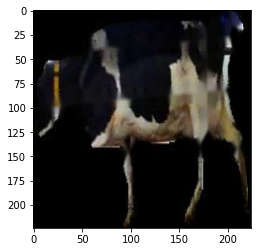

In [ ]:
# Viewing one of the images in the image folder.

img,label = rgb_dataset[0]

plt.imshow(img)

### Transforming data


*All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]. *<b> Refernce : Mobile net website </b>

*While leveraging pre-trained models, it is mandatory to resize, permute, and then normalize images (as appropriate for that pre-trained model), where the images are first scaled to a value between 0 and 1 across the 3 channels and then normalized to a mean of [0.485, 0.456, 0.406] and a standard deviation of [0.229, 0.224, 0.225] across the RGB channels. * <b> Reference : Modern Computer vision using pytorch by </b>

**So as seen from the below we pass the RGB to the datasetfolder class which is the super class for the image folder class and transform as described above for passing to the pre-trained model**

In [ ]:
import torchvision
import numpy
import torch
import torchvision.transforms as tt
from PIL import Image
from numpy import asarray


# fuction for loading image from path into a dataset folder
def npy_loader(path):
  image = Image.open(path)
  transform = tt.Compose([tt.PILToTensor()])
  img_tensor = transform(image)
  # Transforming Tensor to a range of [0,1]
  img_tensor = img_tensor/255
  return img_tensor

# Uploading the image dataset into a dataset folder
Dataset1 = torchvision.datasets.DatasetFolder(
    root='./Cattle_data/Train/RGB',
    loader=npy_loader,
    extensions=('jpg'),
    # transform = tt.Compose([tt.ToTensor()])
    #Normalizing data as expected by model. 
    transform = tt.Compose([tt.Resize(224),tt.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])])
                   
)
    
# import torchvision.transforms as tt

# dataset = ImageFolder(cattle_data_dir_train_rgb,tt.Compose([tt.Resize(50,1),tt.ToTensor()]))

In [ ]:
# Printing dataset for viewing

print(Dataset1)

Dataset DatasetFolder
    Number of datapoints: 2214
    Root location: ./Cattle_data/Train/RGB
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )


In [ ]:
# checking if the tensors are now in the range [0..1] and in float data type

Dataset1.__getitem__(1)

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.0837, -2.0494, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.0837, -2.0494, -2.0837],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.0665, -1.9980],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -1.9832, -1.9482, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9832, -1.9482, -1.9832],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0007, -1.9657, -1.8957],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.6650, -1.6476, -1.7347],
          [-1.8044, -1.8044,

In [ ]:
# checking if the tensors are now in the range [0..1] and in float data type

Dataset1.__getitem__(1000)

(tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.0152, -1.9467, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.0152, -1.9638, -2.1008],
          [-2.1179, -2.1179, -2.1179,  ..., -2.0494, -2.0323, -2.1179],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],
 
         [[-2.0357, -2.0357, -2.0357,  ..., -1.9307, -1.8606, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9307, -1.8782, -2.0182],
          [-2.0357, -2.0357, -2.0357,  ..., -1.9657, -1.9482, -2.0357],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357]],
 
         [[-1.8044, -1.8044, -1.8044,  ..., -1.6999, -1.6650, -1.8044],
          [-1.8044, -1.8044,

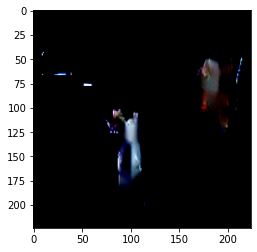

In [ ]:
# Viewing Transformed image

img,label = Dataset1[200]
plt.imshow(img.permute((1,2,0)))


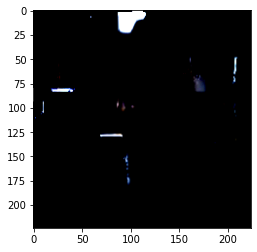

In [ ]:
# Viewing Transformed image

img,label = Dataset1[2213]
plt.imshow(img.permute((1,2,0)))

In [ ]:
# Viewing transformed image shape
img.shape

torch.Size([3, 224, 224])

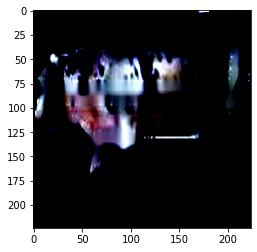

In [ ]:
# Showing transformed dataset image 

img,label = Dataset1[1000]
plt.imshow(img.permute((1,2,0)))

In [ ]:
# Showing transformed dataset image shape
img.shape

torch.Size([3, 224, 224])

<h3> GPU Utilities </h3>

In [ ]:
def get_default_device():
  """ Pick GPU if available, else CPU """
  if torch.cuda.is_available():
    return torch.device('cuda')
  else:
    return torch.device('cpu')

# def to_device(data,device):
#   """ move tensor(s) to chosen device """
#   if isinstance(data, (list,tuple)):
#     return [to_device(x,device) for x in data]
#   return data.to(device, non_blocking = True)

# class DeviceDataLoader():
#   """ Wrap a dataloader to move data to a device"""
#   def __init__(self,d1,device):
#     self.d1 =d1
#     self.device=device

#   def __iter__(self):
#     """ Yield a batch of data after moving it to device """
#     for b in self.d1:
#       yield to_device(b,self.device)

#   def __len__(self):
#     """ number of batches """
#     return len(self.d1)


      

In [ ]:
get_default_device()

device(type='cuda')

## Using the 5-Fold cross validation and creating data loaders



In [ ]:
# Using the 5-Fold cross validation and creating data loaders

from torch.utils.data import DataLoader, SubsetRandomSampler
from sklearn.model_selection import KFold
import torch

splits = KFold(n_splits = 5, shuffle = True, random_state = 42)

for fold, (train_idx, valid_idx) in enumerate(splits.split(Dataset1)):
    print('Fold : {}'.format(fold))
    train_sampler = SubsetRandomSampler(train_idx)
    valid_sampler = SubsetRandomSampler(valid_idx)
    train_loader = torch.utils.data.DataLoader(Dataset1,   
                      batch_size=64, sampler=train_sampler)
    valid_loader = torch.utils.data.DataLoader(Dataset1,
                      batch_size=64, sampler=valid_sampler)
    



Fold : 0
Fold : 1
Fold : 2
Fold : 3
Fold : 4


In [ ]:
#Initialize the neural network
model = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=True)
model
   

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:

# Useful inputs 

feature_extract = True

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 15

# Flag for feature extracting. When False, we finetune the whole model,
#   when True we only update the reshaped layer params
feature_extract = True

https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html

Learn about fine tuning and feature extraction pre-trained ConvNet 

Due to a relatively small data set, which consists of an average
of nine images per cow, a transfer learning approach is preferred
to determine a classification model. A pre-trained convolution neural
network (ConvNet) model is initialized with its last layer replaced from
the 1000 ImageNet classes to the 383 cow classes at hand. All the layers of the given pre-trained ConvNet are unfrozen and
fine-tuned with training images from the new Holstein cattle data
set. 

In [ ]:
import torch.nn as nn

# Feature extraction by initialising the last layer from the 1000 ImageNet classes to 310 cows

model.classifier = nn.Linear(1280, num_classes)
model.to(get_default_device())

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
## Set Model Parameters’ .requires_grad attribute
for param in model.parameters():
  param.requires_grad = True
     
   

In [ ]:
print(model.parameters())

<generator object Module.parameters at 0x7f019e888f20>


## HyperParameters for finetuning

The following hyperparameters are used to fine-tune the
Expert Systems With Applications 192 (2022) 116354
7
A. Bhole et al.
Fig. 10. Examples of RGB, thermal MSX, temperature map and CORF maps for the cattle with ID = 0099.
pre-trained models: learning rate = 0.0005, decay = 0.00001, categorical cross-entropy loss function, Adam optimizer, and early stopping
with 15 epochs. The implementation is based on standard Python
libraries3


In [ ]:
import torch.optim as optim

num_epochs = 15
lr = 0.0005
weight_decay = 0.00001
Optimizer = optim.Adam(model.parameters(), lr, weight_decay=0)
criterion = nn.CrossEntropyLoss()
exp_lr_scheduler = optim.lr_scheduler.StepLR(Optimizer, step_size=10, gamma=0.1)
print(exp_lr_scheduler)

## Training helper functions

In [ ]:
def train_model(model, trainingdata, validationdata,  criterion, optimizer, num_epochs, scheduler):
    for epoch in range(num_epochs):      
        model.train()
        running_loss = 0.0
        running_corrects = 0
        trunning_corrects = 0
        for inputs, labels in trainingdata:
            inputs = inputs.to(get_default_device())
            labels = labels.to(get_default_device())
            optimizer.zero_grad()
            with torch.set_grad_enabled(True):
                outputs = model(inputs)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
            running_loss += loss.item() * inputs.size(0)
            running_corrects += (preds == labels).sum()
            trunning_corrects += preds.size(0)
            scheduler.step()

        epoch_loss = running_loss / trunning_corrects
        epoch_acc = (running_corrects.double()*100) / trunning_corrects
        print('\t\t Training: Epoch({}) - Loss: {:.4f}, Acc: {:.4f}'.format(epoch, epoch_loss, epoch_acc))

        model.eval()   
        vrunning_loss = 0.0
        vrunning_corrects = 0
        num_samples = 0
        for data, labels in validationdata:
            data = data.to(get_default_device())
            labels = labels.to(get_default_device())
            optimizer.zero_grad()
            with torch.no_grad():
                outputs = model(data)
                _, preds = torch.max(outputs, 1)
                loss = criterion(outputs, labels)
            vrunning_loss += loss.item() * data.size(0)
            vrunning_corrects += (preds == labels).sum()
            num_samples += preds.size(0)
        vepoch_loss = vrunning_loss/num_samples
        vepoch_acc = (vrunning_corrects.double() * 100)/num_samples
        print('\t\t Validation({}) - Loss: {:.4f}, Acc: {:.4f}'.format(epoch, vepoch_loss, vepoch_acc))

In [ ]:
train_model(model,train_loader,valid_loader,criterion, Optimizer, num_epochs,exp_lr_scheduler )

		 Training: Epoch(0) - Loss: 5.6873, Acc: 3.1603
		 Validation(0) - Loss: 5.6831, Acc: 3.6199
		 Training: Epoch(1) - Loss: 5.0775, Acc: 14.3905
		 Validation(1) - Loss: 5.6584, Acc: 3.6199
		 Training: Epoch(2) - Loss: 5.0723, Acc: 14.7856
		 Validation(2) - Loss: 5.6577, Acc: 3.6199
		 Training: Epoch(3) - Loss: 5.0710, Acc: 14.7856
		 Validation(3) - Loss: 5.6559, Acc: 3.8462
		 Training: Epoch(4) - Loss: 5.0740, Acc: 14.6163
		 Validation(4) - Loss: 5.6602, Acc: 3.6199
		 Training: Epoch(5) - Loss: 5.0735, Acc: 14.8420
		 Validation(5) - Loss: 5.6533, Acc: 3.8462
		 Training: Epoch(6) - Loss: 5.0748, Acc: 14.6163
		 Validation(6) - Loss: 5.6558, Acc: 3.8462
		 Training: Epoch(7) - Loss: 5.0717, Acc: 14.6727
		 Validation(7) - Loss: 5.6566, Acc: 3.8462
		 Training: Epoch(8) - Loss: 5.0718, Acc: 14.6727
		 Validation(8) - Loss: 5.6583, Acc: 3.8462
		 Training: Epoch(9) - Loss: 5.0737, Acc: 14.4470
		 Validation(9) - Loss: 5.6540, Acc: 3.8462
		 Training: Epoch(10) - Loss: 5.0735, Ac